In [1]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting
import matplotlib.dates as mdates
from obspy.signal.trigger import classic_sta_lta

In [2]:
day141_paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
day141 = load.import_corrected_data_for_single_day(day141_paths)


day141_snapshot = day141.slice(starttime=obspy.UTCDateTime('2019-05-21T07:30:00')
                   ,endtime=obspy.UTCDateTime('2019-05-21T09:00:00'))

In [3]:
len(day141)

6

In [4]:
# x = day141_snapshot.plot()

def plot_waveforms(obspydata, **kwargs):
    """
    obspy plotting sucks balls this is better for data explorations
    """
    data_len = len(obspydata)
    fig, ax = plt.subplots(data_len, figsize=(15, 5*data_len), sharex=True, sharey=True)
    
    for n, tr in enumerate(obspydata):
        ax[n].plot(tr,times('matplotlib'), tr.data, **kwargs)
        
    ax[n].xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))
    fig.tight_layout(pad=0)
    return fig, ax

(<Figure size 1500x2000 with 4 Axes>,
 array([<AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>], dtype=object))

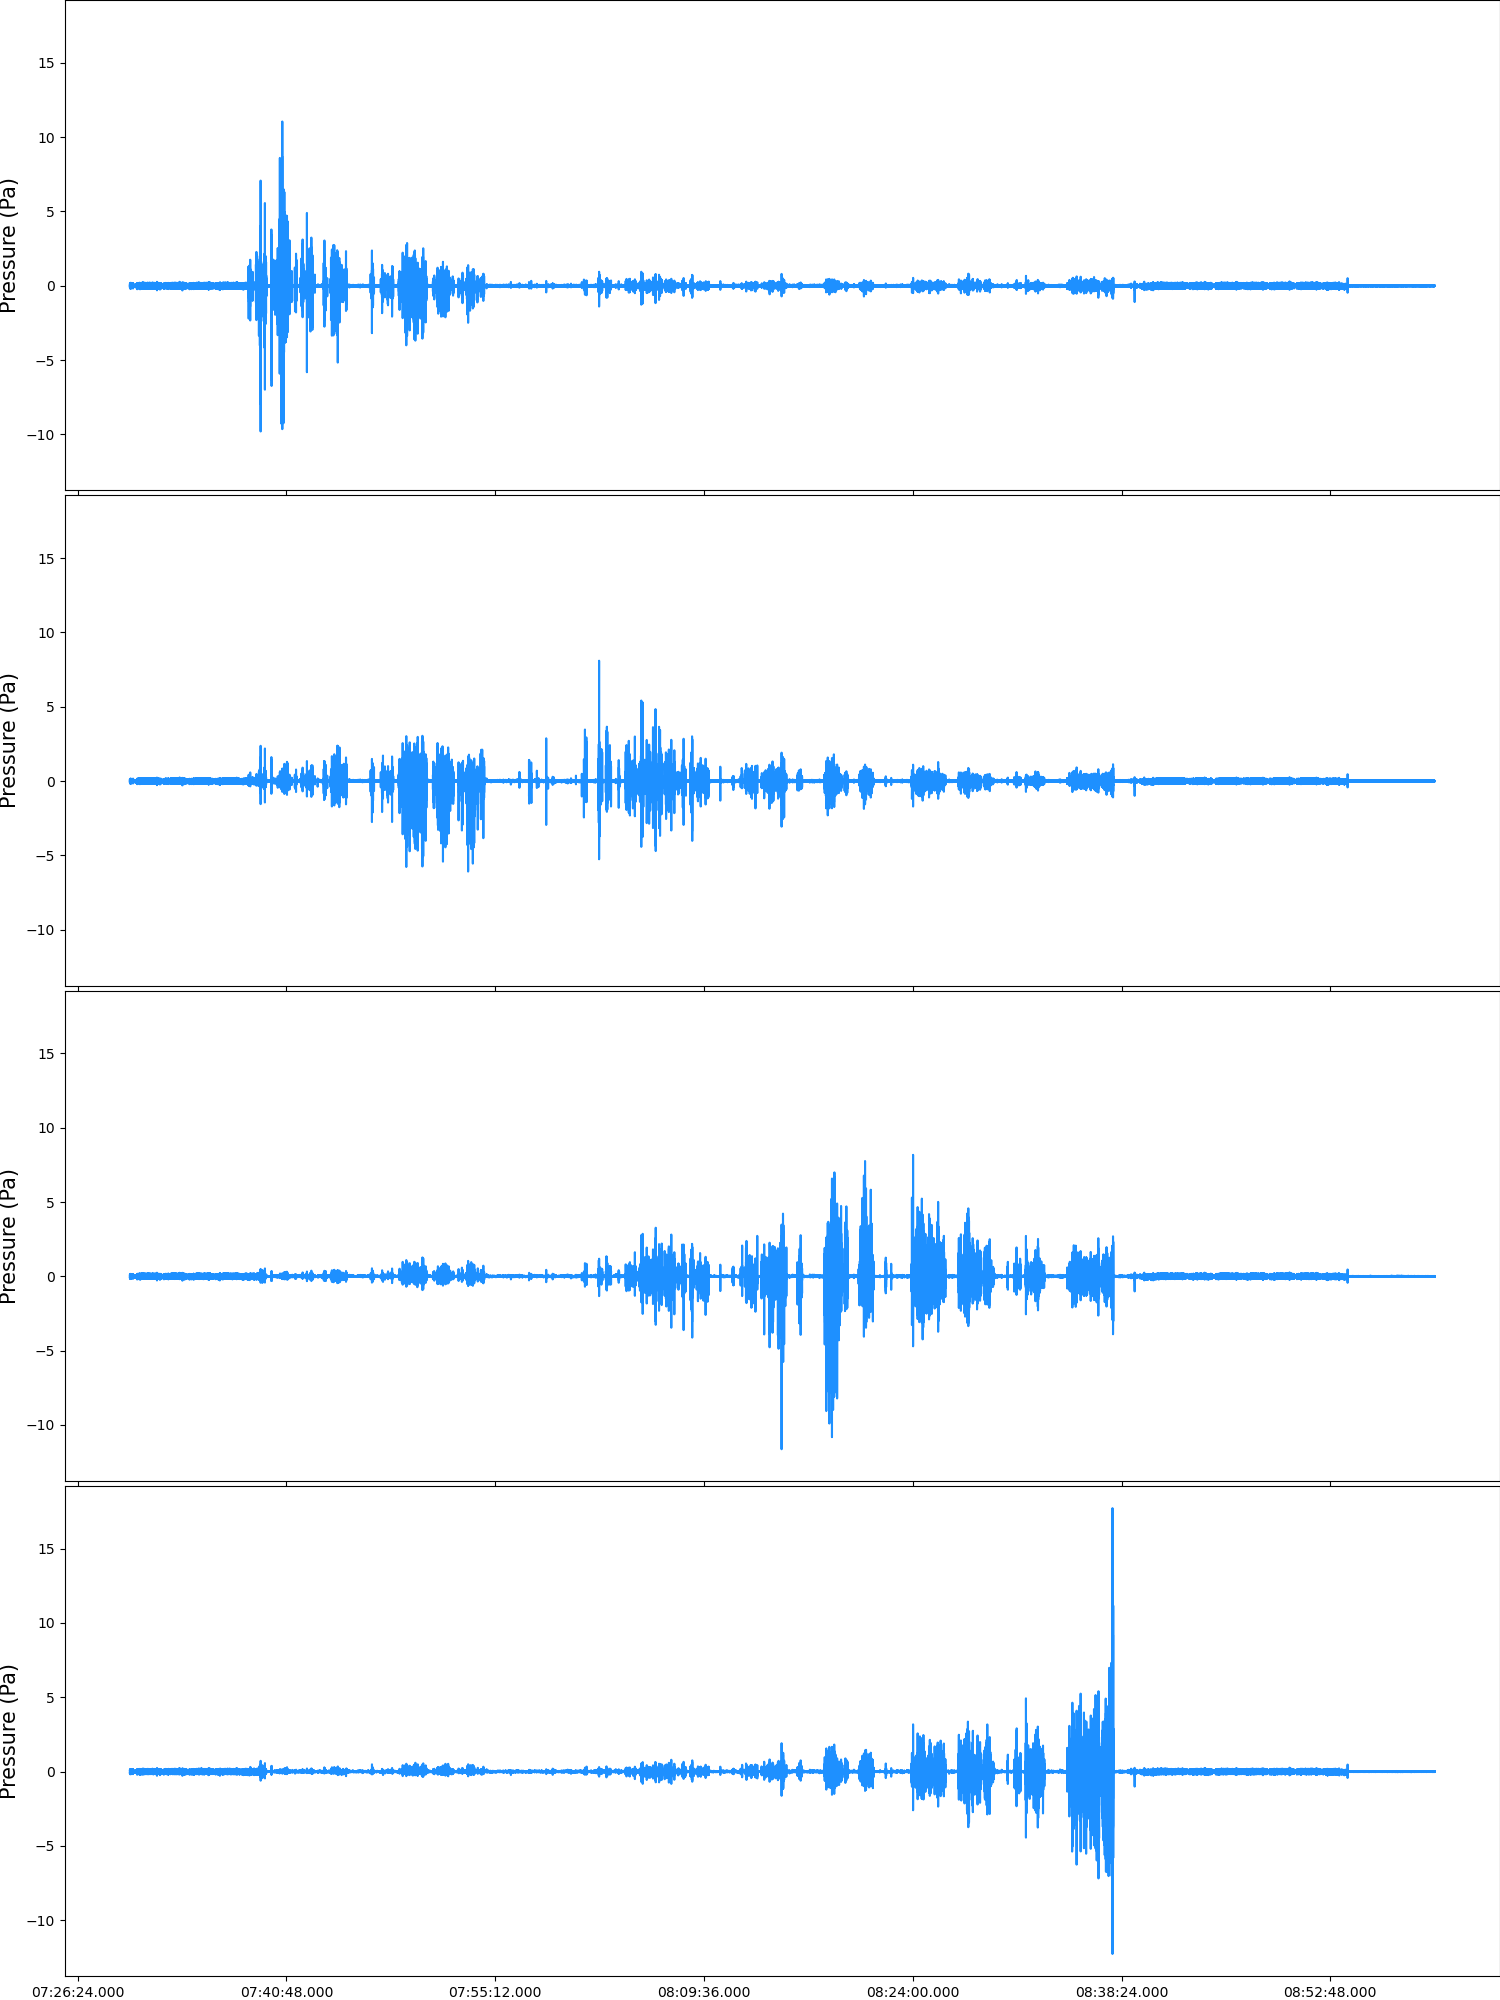

In [5]:
day141_snapshot = day141.slice(starttime=obspy.UTCDateTime('2019-05-21T07:30:00')
                   ,endtime=obspy.UTCDateTime('2019-05-21T09:00:00'))

day141_snapshot.filter(type='highpass', corners=4, zerophase=True, freq=20)

plotting.plot_waveforms(day141_snapshot[2:], color='dodgerblue')
# from obspy.signal.trigger import plot_trigger
# plot_trigger(day141_snapshot[2], cft, thr_on=1.5, thr_off=1)

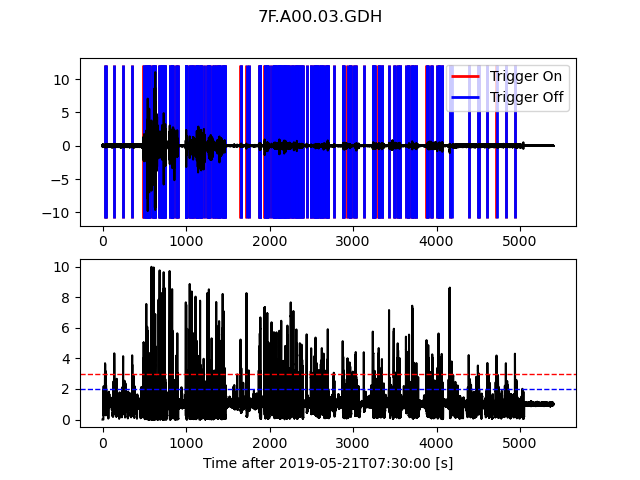

In [6]:
day141_snapshot = day141.slice(starttime=obspy.UTCDateTime('2019-05-21T07:30:00')
                   ,endtime=obspy.UTCDateTime('2019-05-21T09:00:00'))
day141_snapshot.filter(type='highpass', corners=4, zerophase=True, freq=20)
cft = classic_sta_lta(day141_snapshot[2]
                      , nsta=int(1*day141_snapshot[2].stats.sampling_rate)
                      , nlta=int(10*day141_snapshot[2].stats.sampling_rate)
                     )
# plotting.plot_waveforms(day141_snapshot[2:], color='dodgerblue')
from obspy.signal.trigger import plot_trigger
plot_trigger(day141_snapshot[2], cft, thr_on=3, thr_off=2)

NameError: name 'ax2' is not defined

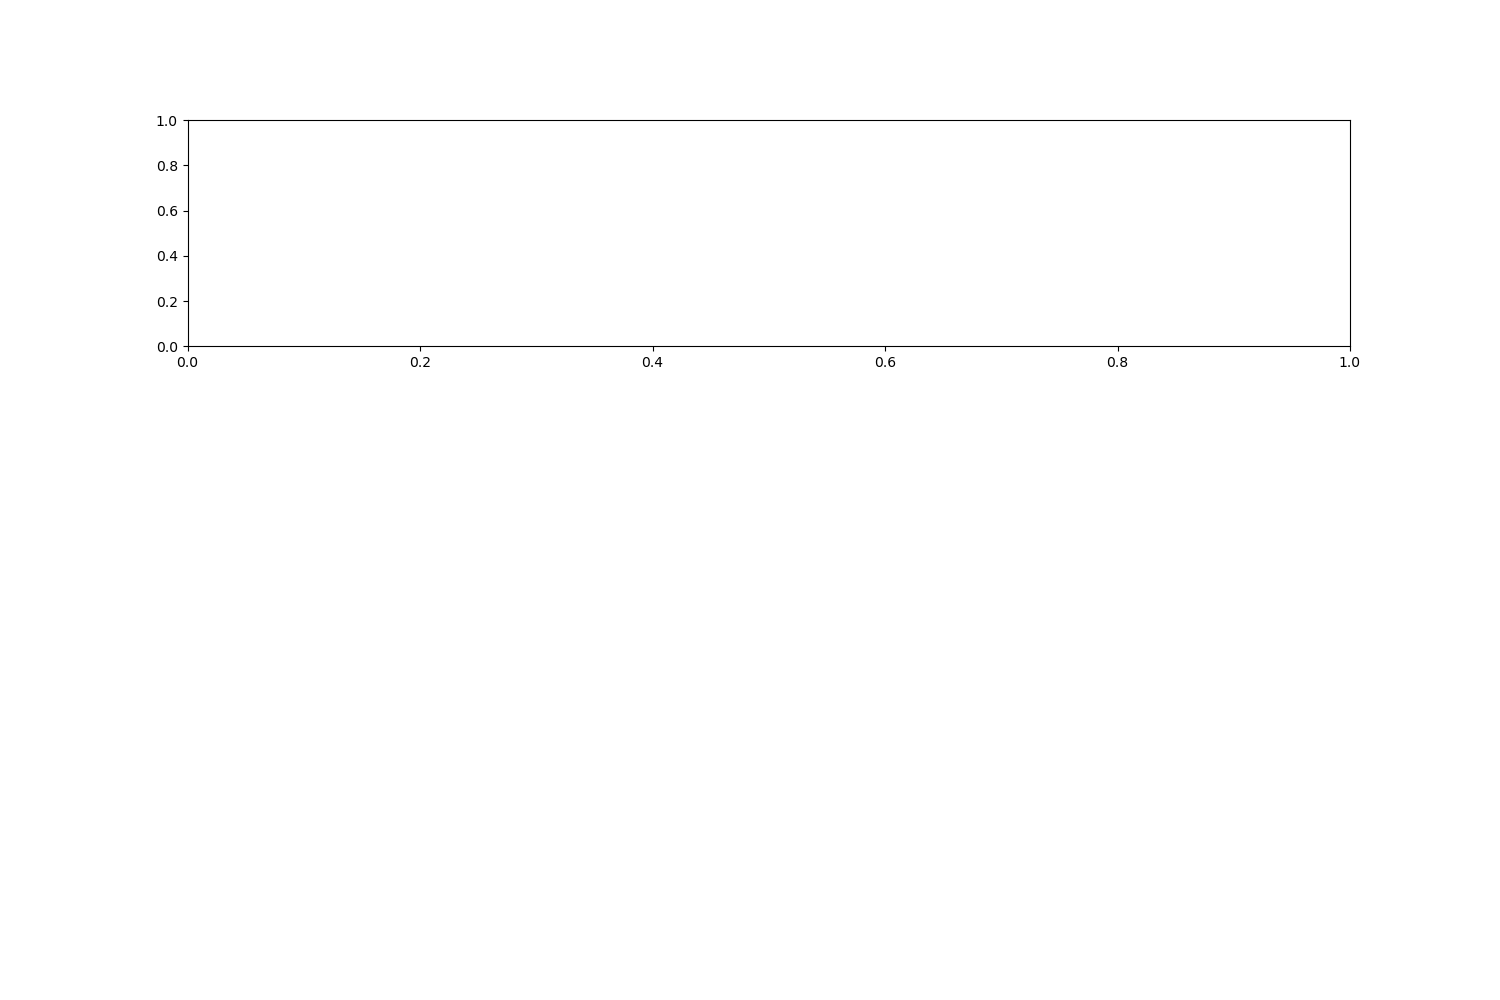

In [7]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3, rowspan=2, sharex=ax2)

starttime = obspy.UTCDateTime('2019-05-21T07:39:44')
endtime = obspy.UTCDateTime('2019-05-21T07:39:49')

data = day141_snapshot[2].slice(starttime=starttime, endtime=endtime)

ax.plot(data.times('matplotlib'), data.data)
# ax.text(s='hydrophone 3', x=0.)
ax.xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))

data.spectrogram(wlen=0.1, cmap='nipy_spectral', axes=ax2,)
ax2.set_ylim(1e-2, 1e2)
fig.tight_layout(pad=0)